This plot shows pollen health impact classes over the Alps on the 15th of February 2020 at 8 o'clock in the evening. Displayed are hourly values for Alder (Alnus) pollen. The field is produced by the COSMO-1E weather model, on the typical COSMO-1E domain over the greater alpine area. For easier understanding the numeric pollen concentrations are converted into health impact classes. These classes are then presented to the public using animated pollen maps in the MeteoSwiss-App. 

In [1]:
# IGNORE THIS CELL WHICH CUSTOMIZES LAYOUT AND STYLING OF THE NOTEBOOK !
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
# Third-party
import cfgrib  # type:ignore # noqa: F401
import iconarray  # type:ignore # noqa: F401
import matplotlib.pyplot as plt  # type:ignore
import numpy as np
import psyplot.project as psy  # type:ignore # noqa: F401
import xarray as xr


In [3]:
ds = xr.open_dataset("/scratch/sadamov/for_annika/data.nc")
ds["ALNU"].values = np.digitize(ds["ALNU"].values, bins=[1, 10, 70, 250])

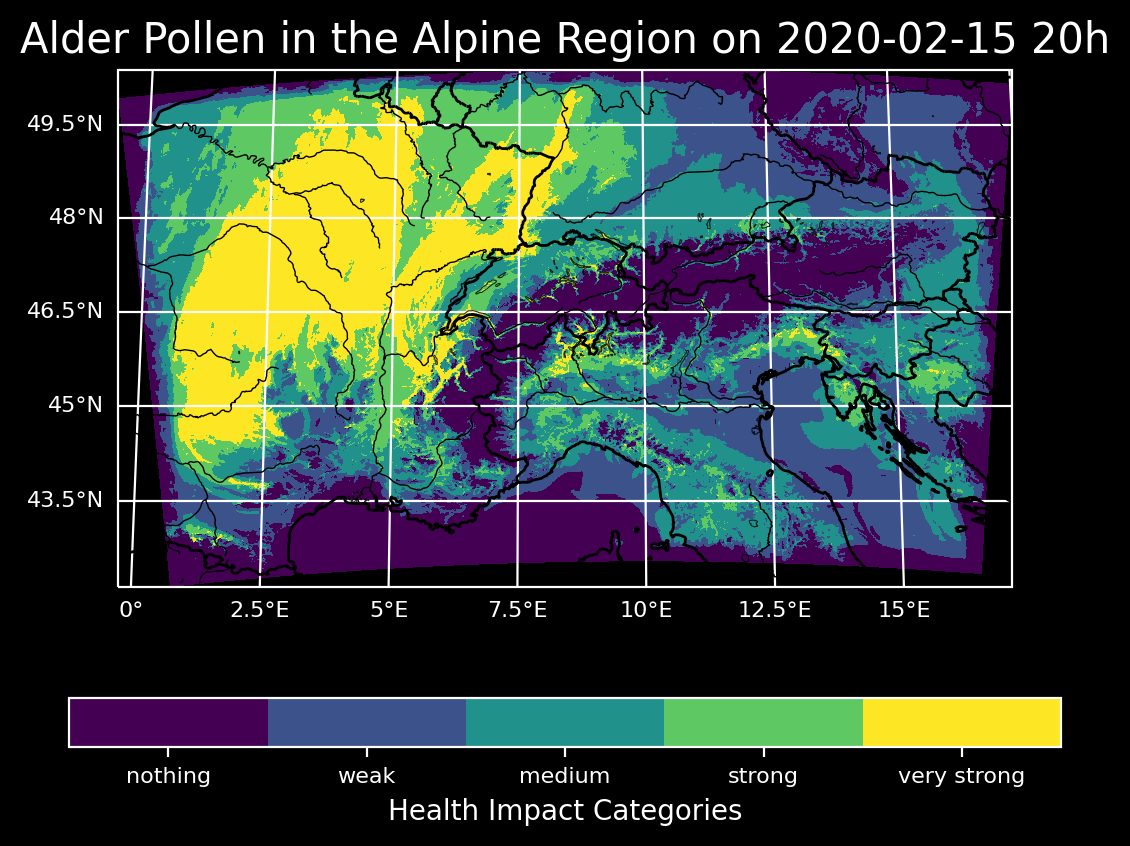

In [4]:
plot1 = ds.psy.plot.mapplot(
    name="ALNU",
    title="Alder Pollen in the Alpine Region on 2020-02-15 20h",
    titlesize=15,
    lakes=True,
    borders=True,
    rivers=True,
    grid_color="white",
    cticksize=8,
    clabel="Health Impact Categories",
    grid_labelsize=8,
    projection="robin",
    cmap="viridis",
)

colorbar_ticks = [0.5, 1.5, 2.5, 3.5, 4.5]
colorbar_bounds = list(range(0, 6, 1))
colorbar_tickslabel = ["nothing", "weak", "medium", "strong", "very strong"]
plot1.update(bounds=colorbar_bounds, cticks=colorbar_ticks, cticklabels=colorbar_tickslabel)

plot1.show()